# Exploratory Data Analysis


This notebook combines the theory (especially statictics), applications and interpretations of the data analysis.

* The goals of the data EDA are:
 * Determine the 

### 1. Problem definition

 * Describe the problem informally and formally.
 * List the motivation for solving the problem, the benefits a solution provides, and how the solution will be used.
 * Describe how the problem would be solved using the domain knowledge.

### 2. Loading the data and packages

 * Load the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

* Load the data 

In [2]:
MROZ = pd.read_stata('data_dta/MROZ.dta')

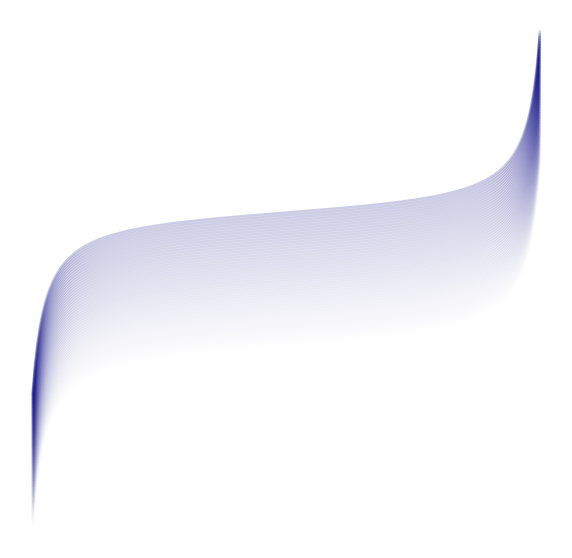

In [75]:
fig, ax = plt.subplots(figsize = (10, 10))
c = 0
for _ in range(50):
    x_grid = np.linspace(-np.pi/2.1, np.pi/2.1, 200)
    y = np.tan(x_grid) + c
    c += 0.2
    ax.plot(x_grid, y, color = (0, 0, 0.5), alpha = c/50, lw = 2.6)
ax.tick_params(which="both", left=False, labelbottom=False, labelleft = False , bottom = False)
for direction in ["top", "right", "left", "bottom"]:
    ax.spines[direction].set_visible(False)

fig.savefig(r'C:\Users\LENOVO\Desktop\personal_web\assets\image\plot.png', dpi=165, bbox_inches="tight" )

### 3. Exploratory Data Anaysis

 * Descriptive statistics: Understanding the dataset is one of the most important steps of model development.
 
  1. Viewing the raw data
  2. Reviewing the dimension of the dataset.
  3. Reviewing the data types of attributes.
  4. Summarizing the distribution, descriptive statistics, and relationship among the variables in the dataset. 
 

* Data Visualization

  1. *Univariate plots*: Histograms and density plots
  2. *Multivariate plots* : Correlation matrix plot and scatterplot

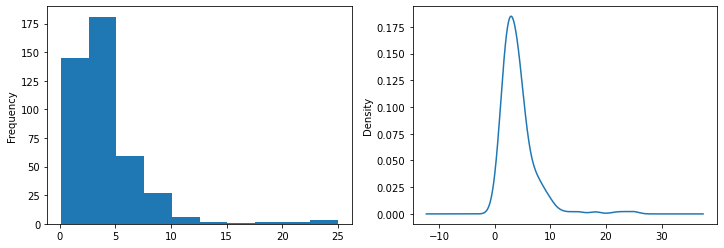

In [10]:
fig, axs = plt.subplots(1,2, figsize =(12, 4))
for i, ax in enumerate(axs):

    kind = 'hist' if i == 0 else 'kde'
    MROZ.wage.plot( ax= ax, kind = kind)

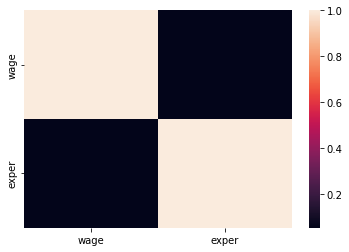

In [25]:
correlation = MROZ.loc[:,['wage', 'exper']].corr()
ax = sns.heatmap(correlation)
ax.set_facecolor('white')

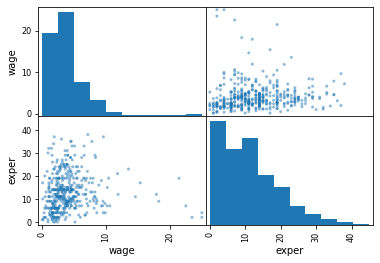

In [27]:
pd.plotting.scatter_matrix(MROZ.loc[:,['wage', 'exper']])
plt.show()

# Pre-processing

### 4. Data preparation

 * **Data cleaning**
   1. Validity: The data type, range, etc.
   2. Accuracy: The degree to which the data is close to the true values.
   3. Completeness: The degree to which all required data is known.
   4. Uniformity: The degree to which the data is specified using the same unit of measure.
  
  The different options for performing data cleaning include:
   6. Dropping “NA” values within data dataset.dropna(axis=0)
   7. Filling “NA” with 0 
   8. Filling NAs with the mean of the column

 * **Feature selection**
  
   Irrelevant or partially relevant features can negatively impact model performance. *Feature selection* is a process in which features in data that contribute most to the prediction variable or output are automatically selected
    * The benefits of performing feature selection before modeling the data are:
     1. Reduces overfitting: Less redundant data means fewer opportunities for the model to make decisions based on noise.
     
     2. Improves performance: Less misleading data means improved modeling performance.
     
     3. Reduces training time and memory footprint: Less data means faster training and lower memory footprint.
    

* `sklearn.feature_selection` module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.
     1. **Variance Treshold**: It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
     2. `SelectKBest`: Select features according to the k highest scores. The `score_func` we choose according the variable y. For instance,`chi2` - Chi-squared stats of non-negative features for *classification tasks*, f_regression - F-value between label/feature for *regression tasks*.
     

#### For Variance Threshold

In [42]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 20)

# The variables that don't pass the threshold. 
# Var>=20
print('Shape before the selection', MROZ.shape)
print('Shape after the selection', sel.fit_transform(MROZ).shape)

Shape before the selection (753, 22)
Shape after the selection (753, 8)


https://github.com/tatsath/fin-ml/tree/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models

### For SelectKBest

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2

In [52]:
X, y = MROZ[['kidslt6','kidsge6' ,'age', 'educ', 'repwage']].copy(), MROZ.inlf.copy()
fit = SelectKBest(score_func = chi2, k = 2).fit(X, y)
scores = pd.DataFrame(fit.scores_, columns = ['score'])
column_names =  pd.DataFrame(X.columns, columns =['names'])
table_scores = pd.concat([column_names, scores], axis = 1)
table_scores.nlargest(2, 'score')

,names,score
4,repwage,957.069555
0,kidslt6,39.679288


When features are irrelevant, they should be dropped.

### 4.3 Data transformation

Many machine learning algorithms make assumptions about the data. It is a good practice to perform the data preparation in such a way that exposes the data in the best possible manner to the machine learning algorithms. 

 1. **Rescaling**: When data comprises attributes with varying scales, many machine learning algorithms can benefit from rescaling all the attributes to the same scale. It helps to speed up the calculations in an algorithm.

 2. **Standardization**: is a useful technique to transform attributes to a standard normal distribution with a mean of zero and a standard deviation of one. Assume the input variables represent a normal distribution.

 3. **Normalization**:  refers to rescaling each observation (row) to have a length of one. (`value` - `min`)/(`max` - `min`). What is the maximun variation of the value respect to `Maximun` variation.


In [56]:
from sklearn.preprocessing import MinMaxScaler
X = np.array([[90, 1, 8,],
            [100, 1.5, 10],
            [79, 1.9, 7],
            [70, 2, 8],
            [85, 1.4, 9.5],
            [76, 1.3, 8.5]])
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_X = pd.DataFrame(scaler.fit_transform(X), columns = ['a', 'b', 'c'])
rescaled_X

,a,b,c
0,0.666667,0.0,0.333333
1,1.000000,0.5,1.000000
2,0.300000,0.9,0.000000
3,0.000000,1.0,0.333333
4,0.500000,0.4,0.833333
5,0.200000,0.3,0.500000


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [59]:
normalize(X)

array([[0.99601164, 0.0110668 , 0.08853437],
       [0.99492638, 0.0149239 , 0.09949264],
       [0.99581159, 0.0239499 , 0.08823647],
       [0.99313262, 0.02837522, 0.11350087],
       [0.99367912, 0.01636648, 0.11105826],
       [0.99366018, 0.01699682, 0.11113305]])

In [29]:
StandardScaler().fit_transform(X)

array([[ 0.68080792, -1.50372088, -0.5       ],
       [ 1.70201979, -0.04850713,  1.5       ],
       [-0.44252515,  1.11566388, -1.5       ],
       [-1.36161584,  1.40670663, -0.5       ],
       [ 0.17020198, -0.33954988,  1.        ],
       [-0.74888871, -0.63059263,  0.        ]])

In [65]:
StandardScaler().fit_transform(X)

array([[-0.50117368,  1.01630288],
       [-0.52286707, -0.64885821],
       [ 1.50279037,  0.89659732],
       [ 0.75760545,  0.09882283],
       [-0.31321457, -0.21171236],
       [-1.35386796, -1.96082029],
       [-0.60415333, -1.31824016],
       [-1.02109207,  0.62268482],
       [ 0.25633697,  1.29320318],
       [ 1.79963589,  0.21201999]])

In [85]:
from sklearn.preprocessing import normalize
normalize(X, norm = 'l1')

array([[0.31033506, 0.68966494],
       [0.400976  , 0.599024  ],
       [0.38889471, 0.61110529],
       [0.40537212, 0.59462788],
       [0.38129093, 0.61870907],
       [0.47968969, 0.52031031],
       [0.45121057, 0.54878943],
       [0.30551436, 0.69448564],
       [0.3279144 , 0.6720856 ],
       [0.43486154, 0.56513846]])

`Encode` string values as numerical values for features such as sex, age group, and race to be used in our model.

In Sklearn the package to make that is `OneHotEncoder`

Essentially, we make one column for each possible value of a categorical variable and then we set just one of these columns equal to a 1 if the observation has that column’s category, and set all other columns to 0.

In [ ]:
from sklearn import preprocessing

In [ ]:
x = np.array(['A', 'B', 'C','A', 'A', 'B', 'C'])
x = x.reshape((-1, 1))

In [ ]:
ohe = preprocessing.OneHotEncoder(sparse=False)
x_ohe = ohe.fit_transform(x)
x_ohe

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

There are three columns because there are three classes

The order is alphabetic, that is, the first columns is 'A', second is 'B', and third is 'C'.

If the categories have as class a number, this go first. 

In [ ]:
x = np.array(['A', 'B', 'C','A', 'A', 'B', 'C', '1', '1', 'A'])
x = x.reshape((-1, 1))

In [ ]:
ohe = preprocessing.OneHotEncoder(sparse=False)
x_ohe = ohe.fit_transform(x)
x_ohe

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

search more informations of how work l1 normalization in sklearn in google or in other sources. tomorrow


### Find Outliers

* `MAD`: Can be Median Absolute Deviation or Mean Absolute Deviation
* Outliers can be > 1.5*`MAD`

In [93]:
def MAD(x):
    return np.median(np.abs(x - np.median(x)))

median = MROZ.huswage.median()
mad = MAD(MROZ.huswage)

MROZ.huswage[MROZ.huswage.agg(lambda x: True if np.abs(x - median)> 2.5*mad else False)]

In [78]:
MROZ.huswage.quantile([0.1, 0.3, 0.5, 0.7, 0.9, 1])

0.1     3.11508
0.3     5.25212
0.5     6.97580
0.7     8.62924
0.9    12.16340
1.0    40.50900
Name: huswage, dtype: float64

<AxesSubplot:ylabel='Frequency'>

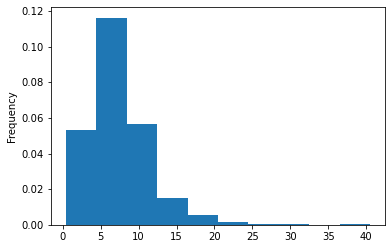

In [82]:
MROZ.huswage.plot(kind = 'hist', density = True)

### 5. Evaluate models
 * **Training and test split**: We can take our original dataset and split it into two parts: train the algorithm on the first part, make predictions on the second part, and evaluate the predictions against the expected results.


``` python 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25,
                                                    random_state = 2)
```


 * **Identify evaluation metrics**: Choosing which metric to use to evaluate machine learning algorithms is very important. Different types of evaluation metrics used for different kinds of ML models

 *  **Compare models and algorithms**: Selecting a machine learning model or algorithm is both an art and a science

In [208]:
from sklearn.model_selection import train_test_split
n = 100
X = 2 - 3 * np.random.normal(0, 1, n)
Y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.exp(-X) + np.random.normal(-3, 3, n)
# transforming the data to include another axis
X = X.reshape((n, 1))
Y = Y.reshape((n, 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.25, 
                                                    random_state = 2)

We will use two models:
 1. linear regression and 
 2. the polynomial regression to fit Y against X

Then, we will evaluate algorithms using the *Root Mean Squared Error (RMSE)* metric, which is one of the measures of the model perfor‐
mance

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Linear model : $y_i = b_0 + b_1 x_i + \epsilon_i $

In [209]:
model = LinearRegression()
model.fit(X_train, Y_train)
print("Estimated Linear Model: y = {:.2} + {:.2}x".format(model.intercept_[0], model.coef_[0][0]))

Estimated Linear Model: y = 3.3 + 1.1e+01x


In [210]:
Y_pred = model.predict(X_train)
rmse_lin = mean_squared_error(Y_train,Y_pred)
print("RMSE for Linear Regression: {:.8}".format(rmse_lin))

RMSE for Linear Regression: 3391.3138


In [211]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

Polinomial model (degree = 2) : $y_i = b_0 + b_1 x_i + b_2 x^2 +  \epsilon_i $ ,  for a feature

If we have two features 

Polinomial model (degree = 2) : $y_i = b_0 + b_1 x_{1i} + b_2 x_{1i}^2 + b_3 x_{2i} + b_4 x_{2i}^2 + b_5 x_{2i} x_{1i} + \epsilon_i $

In [212]:
model = LinearRegression()
model.fit(x_poly, Y_train)
print("Estimated Polynomial Regression: y = {:.4} + {:.4}x + {:.4}x**2".format(model.intercept_[0], model.coef_[0][1], model.coef_[0][2]))

Estimated Polynomial Regression: y = -24.43 + -0.84x + 2.861x**2


In [213]:
Y_poly_pred = model.predict(x_poly)
rmse = mean_squared_error(Y_train,Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse)

RMSE for Polynomial Regression: 543.8220492066819


We can see that the RMSE of the polynomial regression is slightly better than that of
the linear regression

### 6. Model tuning
 Finding the best combination of hyperparameters of a model can be treated as a search problem.4 This searching exercise is often known as model tuning and is one of the most important steps of model development. It is achieved by searching for the best parameters of the model by using techniques such as a grid search. In a grid search, you create a grid of all possible hyperparameter combinations and train the model using each one of them.
 
 However, there are other techniques for model tuning like *Bayesian Optimization*

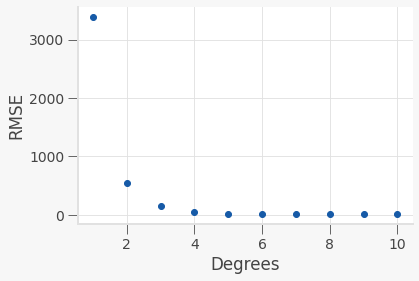

In [214]:
e = []

for degree in range(1, 11):
    polynomial_features= PolynomialFeatures(degree = degree)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    Y_poly_pred = model.predict(x_poly)
    rmse = mean_squared_error(Y_train,Y_poly_pred)
    e.append(rmse )
fig, ax = plt.subplots()    
ax.plot(list(range(1, 11)), e, 'o')
ax.set_xlabel('Degrees')
ax.set_ylabel('RMSE')
ax.set_facecolor('white')
plt.show()

We can choose the degree 3, due to that the RMSE come down to 0, but before using the x_test

### 7. Finalize the model

**Performance on the test set**.

The model selected during the training steps is further evaluated on the test set. The test set allows us to compare different models in an unbiased way, by basing the comparisons in data that were not used in any part of the training. The test results for the model developed in the previous step are shown in the following example

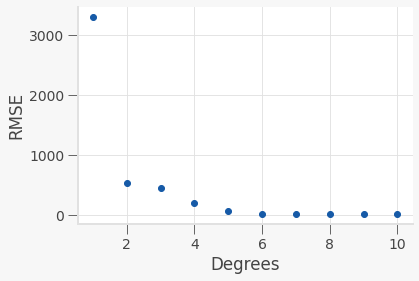

In [215]:
w = []

for degree in range(1, 11):
    polynomial_features= PolynomialFeatures(degree = degree)
    x_poly_test = polynomial_features.fit_transform(X_test)
    x_poly_train = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly_train, Y_train)
    Y_poly_pred = model.predict(x_poly_test)
    rmse = mean_squared_error(Y_test,Y_poly_pred)
    w.append(rmse )
fig, ax = plt.subplots()    
ax.plot(list(range(1, 11)), w, 'o')
ax.set_xlabel('Degrees')
ax.set_ylabel('RMSE')
ax.set_facecolor('white')
plt.show()

We can see the degree 6 is enought.

In [251]:
polynomial_features= PolynomialFeatures(degree = 6)
x_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly, Y_train)

LinearRegression()

 **Save/deploy**

After finding an accurate machine learning model, it must be saved
and loaded in order to ensure its usage later

*Pickle* is one of the packages for saving and loading a trained model in Python.

In [255]:
# Save Model Using Pickle
from joblib import dump, load
# save the model to disk
file_name_model = 'model_save.joblib'
dump(model, file_name_model)

['model_save.joblib']

In [256]:
# load the model from disk
loaded_model = load(file_name_model)

In [257]:
polynomial_features= PolynomialFeatures(degree = 6)
x_poly_test = polynomial_features.fit_transform(X_test)
loaded_model.predict(x_poly_test)

array([[-12.69652536],
       [ -3.27132623],
       [ 70.36939346],
       [ 14.21819781],
       [-13.15214302],
       [ 58.82628162],
       [  2.13151101],
       [-16.48934733],
       [ -1.98169197],
       [ -2.94352553],
       [-15.06289858],
       [ 90.77953587],
       [ 63.46858979],
       [ -4.65999293],
       [ -1.99449548],
       [147.76543439],
       [185.22568718],
       [ -2.26607055],
       [ 12.9976667 ],
       [ -3.84063257],
       [ -4.04270951],
       [ -1.98136848],
       [267.55543436],
       [ -4.60481681],
       [ 47.43756669]])